# **Import Library yang dibutuhkan**

In [ ]:
# Mengimport Library yang dibutuhkan

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Import Library yang dibutuhkan

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV


# **Load Dataset**

In [ ]:
# Load Dataset

df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_Firefox_1.csv")
df.head()

,userName,score,at,content
0,tomi ardhiani,5,2024-06-29 01:47:04,good
1,Seto Wibowo,2,2024-06-29 00:48:57,"Untuk browsing lancar, tapi saat download file..."
2,Alfredo Soares,5,2024-06-28 23:34:42,Auto Liker
3,Afifa Marwah,1,2024-06-28 15:52:09,"Gbs didownload , pdhl memo juga msh lumayan penuh"
4,Yan,5,2024-06-28 15:36:03,bagus


In [ ]:
# Menampilkan Column Content, Username, dan at.

df = df[['content']]
df

,content
0,good
1,"Untuk browsing lancar, tapi saat download file..."
2,Auto Liker
3,"Gbs didownload , pdhl memo juga msh lumayan penuh"
4,bagus
...,...
1995,Mempermudah aktivitas semuanya
1996,bagus
1997,bagus
1998,Coba dulu yah


In [ ]:
# Memberikan Informasi terkait Dataset yang digunakan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  2000 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB


In [ ]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.

df.describe()

,content
count,2000
unique,1359
top,ok
freq,74


# **Pre - Processing**


1.   Cleaning Data
2.   Case Folding
3.   Normalization
4.   Stopword
5.   Tokenize
6.   Stemming
7.   Translate
8.   Labeling

# **Cleaning Data & Case Folding**

In [ ]:
# Mengetahui jumlah berapa baris dan kolom.

df.shape

(2000, 1)

In [ ]:
# Menghapus data yang duplicate

df = df.drop_duplicates(subset=['content'])

In [ ]:
# Mengecek data yang duplikat

df.duplicated().sum()

0

In [ ]:
# Menghapus data yang kosong

df = df.dropna()

In [ ]:
# Memastikan tidak ada missing value yang tersisa.

df.isnull().sum()

content    0
dtype: int64

In [ ]:
# Mengetahui jumlah berapa baris dan kolom setelahnya

df.shape

(1359, 1)

In [ ]:
# Fungsi Cleaning Text

def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [ ]:
# Fungsi Hapus Emoji

def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [ ]:
# Mengaplikasikan Fungsi Cleaning Text, Emoji, dan Case Folding yang sudah dibuat kedalam column 'content'

df['cleaning'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,cleaning
0,good,good
1,"Untuk browsing lancar, tapi saat download file...",untuk browsing lancar tapi saat download file ...
2,Auto Liker,auto liker
3,"Gbs didownload , pdhl memo juga msh lumayan penuh",gbs didownload pdhl memo juga msh lumayan penuh
4,bagus,bagus
...,...,...
1992,aplikasi nya keren,aplikasi nya keren
1993,I will add a star if Firefox for android is ad...,i will add a star if firefox for android is ad...
1994,I love it this browser,i love it this browser
1995,Mempermudah aktivitas semuanya,mempermudah aktivitas semuanya


# **Normalization**

In [ ]:
# Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal",
        "kemare" : "kemarin",
        "dislek" : "dislike",
        "ngk" : "ngga",
        "mobeli" : "mobile",
        "bguss" : "bagus",
        "yyuy" : "",
        "sakarag" : "sekarang",
        "gbs" : "gabisa",
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['normalization'] = df['cleaning'].apply(lambda x: normalisasi(x))
df

,content,cleaning,normalization
0,good,good,good
1,"Untuk browsing lancar, tapi saat download file...",untuk browsing lancar tapi saat download file ...,untuk browsing lancar tapi saat download file ...
2,Auto Liker,auto liker,auto liker
3,"Gbs didownload , pdhl memo juga msh lumayan penuh",gbs didownload pdhl memo juga msh lumayan penuh,gabisa didownload pdhl memo juga msh lumayan p...
4,bagus,bagus,bagus
...,...,...,...
1992,aplikasi nya keren,aplikasi nya keren,aplikasi nya keren
1993,I will add a star if Firefox for android is ad...,i will add a star if firefox for android is ad...,i will add a star if firefox for android is ad...
1994,I love it this browser,i love it this browser,i love it this browser
1995,Mempermudah aktivitas semuanya,mempermudah aktivitas semuanya,mempermudah aktivitas semuanya


# **Stopwords**

In [ ]:
# Menginstall Library Sastrawi

!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.3 MB/s eta 0:00:00


In [ ]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["aku", "anda", "bagaimana", "bahwa", "banyak", "beberapa", "bisa", "dan", "dari", "dengan", "dia", "di", "ini", "itu", "kamu", "kami", "kapan", "karena", "kita", "mereka", "pada", "saja", "sangat", "saya", "sebagaimana", "sebagai", "sebelum", "sudah", "tetapi", "tidak", "untuk", "yang",
                   "saya", "kamu", "dia", "mereka", "kita", "kami", "engkau", "anda", "kalian", "ini", "itu", "di", "ke", "dari", "pada", "dengan", "untuk", "kepada", "oleh", "sampai", "hingga", "sejak", "demi", "dan", "atau", "tetapi", "bahwa", "sehingga", "karena", "meskipun", "walaupun", "namun", "si",
                   "sang", "para", "bukan", "sudah", "belum", "masih", "akan", "telah", "sedang", "bisa", "dapat", "harus"]

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['stopwords'] = df['normalization'].apply(lambda x: stopwords(x))
df

,content,cleaning,normalization,stopwords
0,good,good,good,good
1,"Untuk browsing lancar, tapi saat download file...",untuk browsing lancar tapi saat download file ...,untuk browsing lancar tapi saat download file ...,browsing lancar saat download file terlihat pr...
2,Auto Liker,auto liker,auto liker,auto liker
3,"Gbs didownload , pdhl memo juga msh lumayan penuh",gbs didownload pdhl memo juga msh lumayan penuh,gabisa didownload pdhl memo juga msh lumayan p...,gabisa didownload pdhl memo msh lumayan penuh
4,bagus,bagus,bagus,bagus
...,...,...,...,...
1992,aplikasi nya keren,aplikasi nya keren,aplikasi nya keren,aplikasi nya keren
1993,I will add a star if Firefox for android is ad...,i will add a star if firefox for android is ad...,i will add a star if firefox for android is ad...,i will add a star if firefox for android is ad...
1994,I love it this browser,i love it this browser,i love it this browser,i love it this browser
1995,Mempermudah aktivitas semuanya,mempermudah aktivitas semuanya,mempermudah aktivitas semuanya,mempermudah aktivitas semuanya


# **Tokenize**

In [ ]:
# Tokenize

df['tokenized'] = df['stopwords'].apply(lambda x:x.split())
df

,content,cleaning,normalization,stopwords,tokenized
0,good,good,good,good,[good]
1,"Untuk browsing lancar, tapi saat download file...",untuk browsing lancar tapi saat download file ...,untuk browsing lancar tapi saat download file ...,browsing lancar saat download file terlihat pr...,"[browsing, lancar, saat, download, file, terli..."
2,Auto Liker,auto liker,auto liker,auto liker,"[auto, liker]"
3,"Gbs didownload , pdhl memo juga msh lumayan penuh",gbs didownload pdhl memo juga msh lumayan penuh,gabisa didownload pdhl memo juga msh lumayan p...,gabisa didownload pdhl memo msh lumayan penuh,"[gabisa, didownload, pdhl, memo, msh, lumayan,..."
4,bagus,bagus,bagus,bagus,[bagus]
...,...,...,...,...,...
1992,aplikasi nya keren,aplikasi nya keren,aplikasi nya keren,aplikasi nya keren,"[aplikasi, nya, keren]"
1993,I will add a star if Firefox for android is ad...,i will add a star if firefox for android is ad...,i will add a star if firefox for android is ad...,i will add a star if firefox for android is ad...,"[i, will, add, a, star, if, firefox, for, andr..."
1994,I love it this browser,i love it this browser,i love it this browser,i love it this browser,"[i, love, it, this, browser]"
1995,Mempermudah aktivitas semuanya,mempermudah aktivitas semuanya,mempermudah aktivitas semuanya,mempermudah aktivitas semuanya,"[mempermudah, aktivitas, semuanya]"


# **Stemming**

In [ ]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# df['steamming'] = df['tokenized'].apply(stemming)

# df['steamming'].to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_Firefox_1.csv', index = False)


In [ ]:
df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_Firefox_1.csv', encoding = 'latin1')
df_steamming

,steamming
0,good
1,browsing lancar saat download file lihat progr...
2,auto liker
3,gabisa didownload pdhl memo msh lumayan penuh
4,bagus
...,...
1354,aplikasi nya keren
1355,i will add a star if firefox for android is ad...
1356,i love it this browser
1357,mudah aktivitas semua


# **Translate**

In [ ]:
# # Menginstall Library easynmt

# !pip install -U easynmt

In [ ]:
# import pandas as pd
# from easynmt import EasyNMT

In [ ]:
# # Load Data Hasil Stemming

# df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_Firefox_1.csv', encoding = 'latin1')


In [ ]:
# # Menentukan Asal & Target Bahasa yang akan diterjemahkan

# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

In [ ]:
# model = EasyNMT('opus-mt')  # You can choose a different model name here

In [ ]:
# # Imputing NaN Values

# df_values = df_steamming.fillna(method = 'pad')
# df_values

In [ ]:
# # Mengaplikasikan Fungsi Translate yang sudah dibuat kedalam column 'content'

# df_values['steamming_en'] = df_values['steamming'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df_values.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Firefox_1.csv')

In [ ]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Firefox_1.csv')
df_values

,Unnamed: 0,steamming,steamming_en
0,0,good,good
1,1,browsing lancar saat download file lihat progr...,browsing smoothly when downloading files see p...
2,2,auto liker,auto liker
3,3,gabisa didownload pdhl memo msh lumayan penuh,can't be downloaded at the memo msh is quite full
4,4,bagus,Good.
...,...,...,...
1354,1354,aplikasi nya keren,It's a cool app.
1355,1355,i will add a star if firefox for android is ad...,I will add a star if firefox for android is ad...
1356,1356,i love it this browser,I love it this browser
1357,1357,mudah aktivitas semua,Easy activity. All right?


# **Labeling**

In [ ]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Firefox_1.csv')
df_values


,Unnamed: 0,steamming,steamming_en
0,0,good,good
1,1,browsing lancar saat download file lihat progr...,browsing smoothly when downloading files see p...
2,2,auto liker,auto liker
3,3,gabisa didownload pdhl memo msh lumayan penuh,can't be downloaded at the memo msh is quite full
4,4,bagus,Good.
...,...,...,...
1354,1354,aplikasi nya keren,It's a cool app.
1355,1355,i will add a star if firefox for android is ad...,I will add a star if firefox for android is ad...
1356,1356,i love it this browser,I love it this browser
1357,1357,mudah aktivitas semua,Easy activity. All right?


In [ ]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK

!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [ ]:
# Import Library yang dibutuhkan

import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Labeling With TextBlob

data_review = list(df_values['steamming_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 742
Netral = 516
Negatif = 101

Total Data Seluruhnya : 1359


In [ ]:
# Melihat Status Sentimen

df_values['sentimen'] = status
df_values

,Unnamed: 0,steamming,steamming_en,sentimen
0,0,good,good,Positif
1,1,browsing lancar saat download file lihat progr...,browsing smoothly when downloading files see p...,Negatif
2,2,auto liker,auto liker,Netral
3,3,gabisa didownload pdhl memo msh lumayan penuh,can't be downloaded at the memo msh is quite full,Positif
4,4,bagus,Good.,Positif
...,...,...,...,...
1354,1354,aplikasi nya keren,It's a cool app.,Positif
1355,1355,i will add a star if firefox for android is ad...,I will add a star if firefox for android is ad...,Netral
1356,1356,i love it this browser,I love it this browser,Positif
1357,1357,mudah aktivitas semua,Easy activity. All right?,Positif


In [ ]:
# Menghapus Colum Unnamed: 0

data_final = df_values.drop(columns=['Unnamed: 0'])
data_final

,steamming,steamming_en,sentimen
0,good,good,Positif
1,browsing lancar saat download file lihat progr...,browsing smoothly when downloading files see p...,Negatif
2,auto liker,auto liker,Netral
3,gabisa didownload pdhl memo msh lumayan penuh,can't be downloaded at the memo msh is quite full,Positif
4,bagus,Good.,Positif
...,...,...,...
1354,aplikasi nya keren,It's a cool app.,Positif
1355,i will add a star if firefox for android is ad...,I will add a star if firefox for android is ad...,Netral
1356,i love it this browser,I love it this browser,Positif
1357,mudah aktivitas semua,Easy activity. All right?,Positif


# **Visualization**


1.   Bar Plot
2.   Pie Chart
3.   Wordcloud



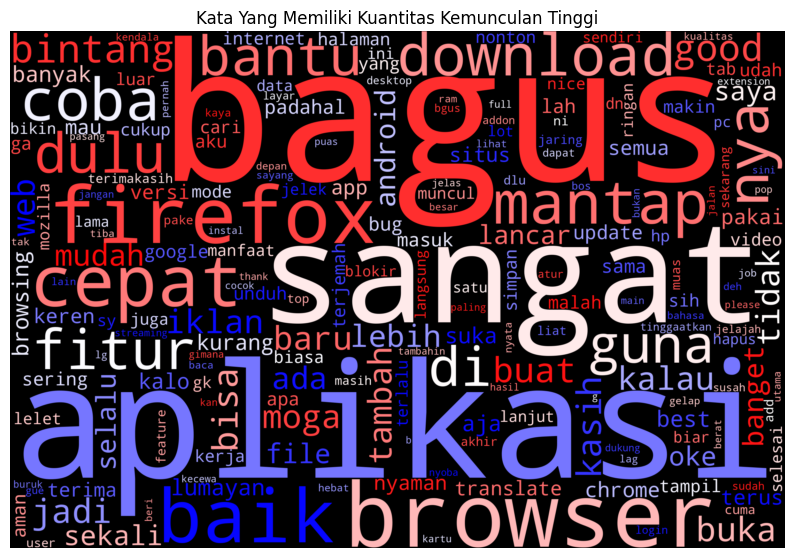

In [ ]:
# Visualisasi Kata Yang Memiliki Kuantitas Kemunculan Paling Tinggi

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Kemunculan Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in data_final['steamming']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


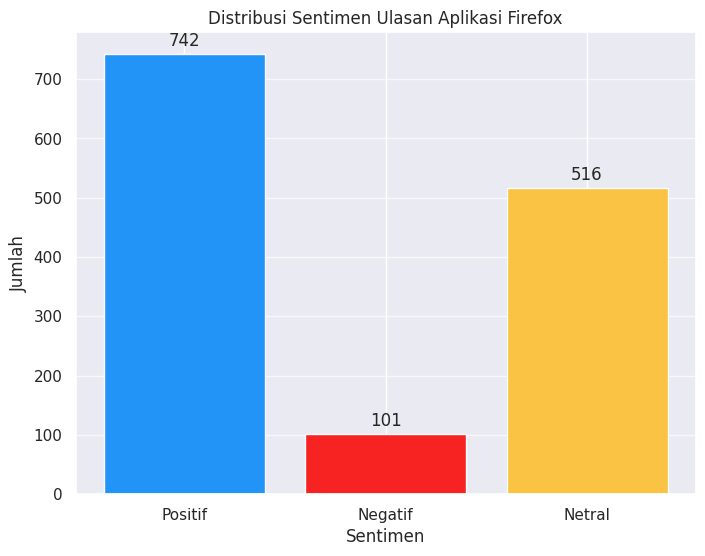

In [ ]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Firefox")


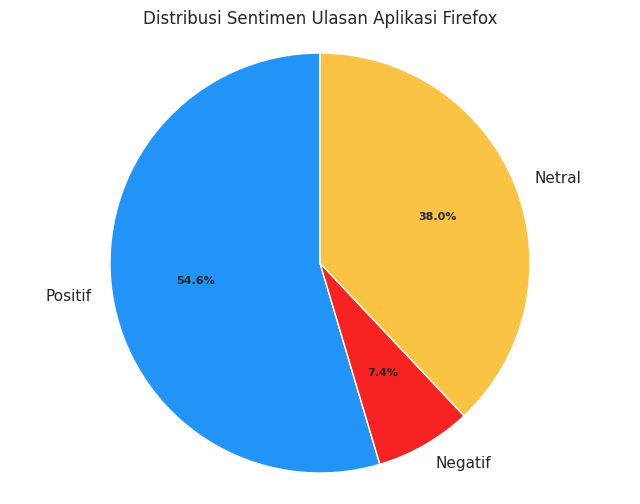

In [ ]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Firefox")

In [ ]:
# Menghapus Sentimen Netral

data_final = data_final[data_final['sentimen'] != 'Netral']
data_final

,steamming,steamming_en,sentimen
0,good,good,Positif
1,browsing lancar saat download file lihat progr...,browsing smoothly when downloading files see p...,Negatif
3,gabisa didownload pdhl memo msh lumayan penuh,can't be downloaded at the memo msh is quite full,Positif
4,bagus,Good.,Positif
6,aplikasi bagus cepat jika jaring ada indah bis...,"A good app. Quick. If there's a beautiful net,...",Positif
...,...,...,...
1352,the best browser to get rid of all ads,the best browser to get rid of all ads,Positif
1353,mau mentidaktifkan java script aboutconfig mal...,want to inactive java script aboutconfig even ...,Positif
1354,aplikasi nya keren,It's a cool app.,Positif
1356,i love it this browser,I love it this browser,Positif


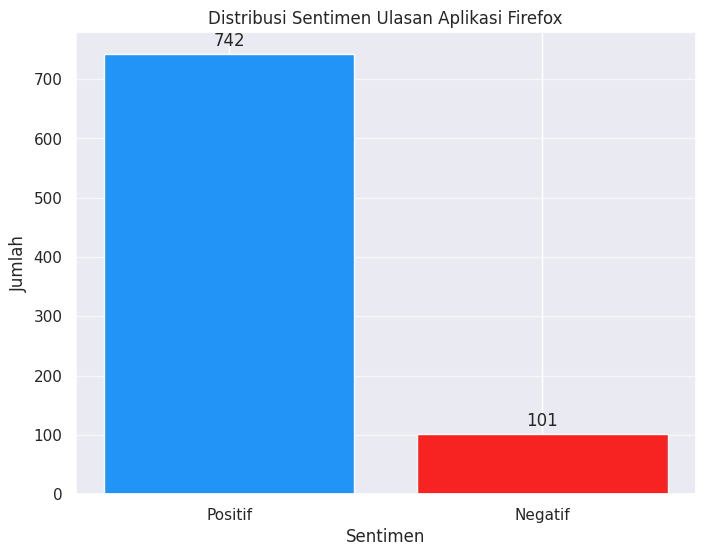

In [ ]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Firefox")


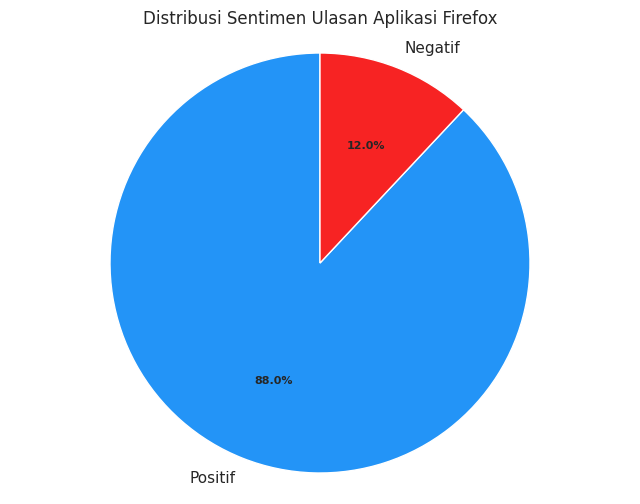

In [ ]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Firefox")

In [ ]:
# Replace Data Sentimen

data_final = data_final.replace({'Positif':0, 'Negatif':1})
data_final

,steamming,steamming_en,sentimen
0,good,good,0
1,browsing lancar saat download file lihat progr...,browsing smoothly when downloading files see p...,1
3,gabisa didownload pdhl memo msh lumayan penuh,can't be downloaded at the memo msh is quite full,0
4,bagus,Good.,0
6,aplikasi bagus cepat jika jaring ada indah bis...,"A good app. Quick. If there's a beautiful net,...",0
...,...,...,...
1352,the best browser to get rid of all ads,the best browser to get rid of all ads,0
1353,mau mentidaktifkan java script aboutconfig mal...,want to inactive java script aboutconfig even ...,0
1354,aplikasi nya keren,It's a cool app.,0
1356,i love it this browser,I love it this browser,0


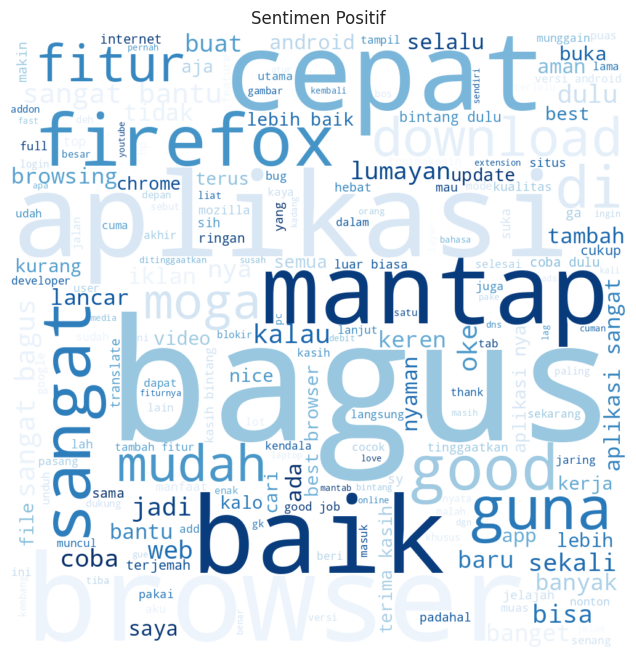

In [ ]:
# Visualisasi Wordcould Positif & Negatif

data_positif = data_final[data_final['sentimen'] == 0]
data_negatif = data_final[data_final['sentimen'] == 1]

# Sentimen Positif

all_words = ' '.join([reviews for reviews in data_positif['steamming']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

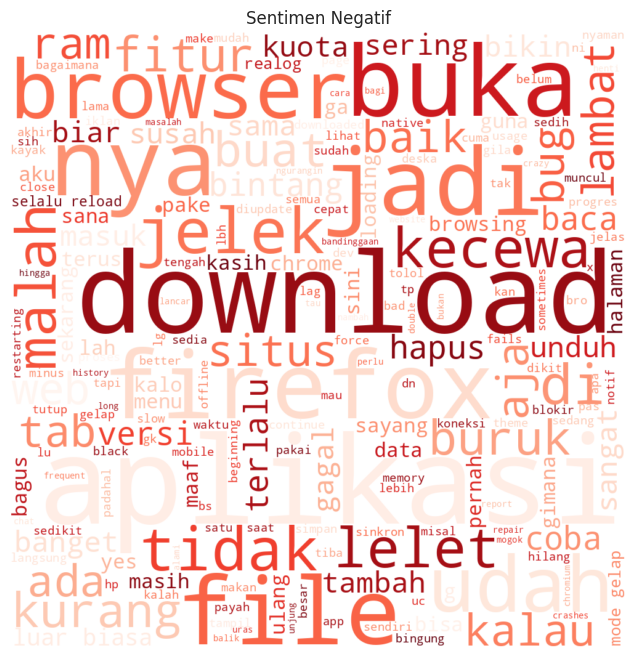

In [ ]:
# Sentimen Negatif

all_words = ' '.join([reviews for reviews in data_negatif['steamming']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

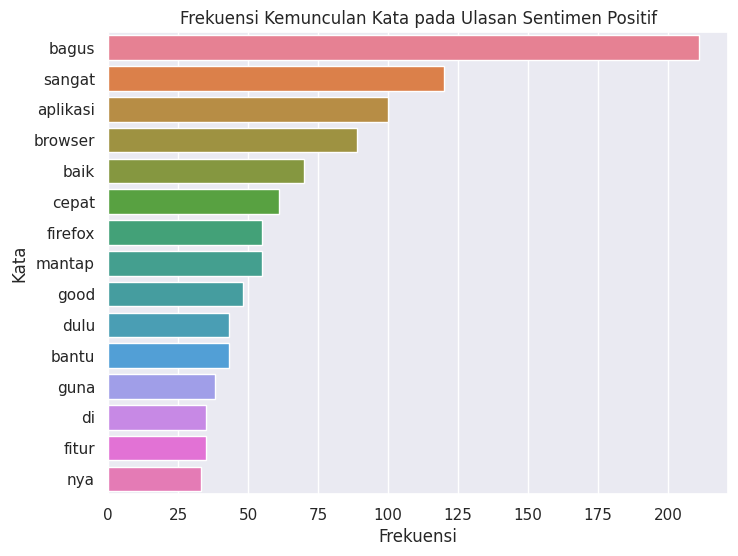

In [ ]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif

# Memfilter ulasan dengan sentimen positif
positive_reviews = data_final[data_final['sentimen'] == 0]['steamming'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(positive_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 15
top_words_positive = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_positive)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [ ]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen positif : \n")
print(top_words_positive.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen positif : 

    kata  frekuensi
   bagus        211
  sangat        120
aplikasi        100
 browser         89
    baik         70
   cepat         61
 firefox         55
  mantap         55
    good         48
    dulu         43
   bantu         43
    guna         38
      di         35
   fitur         35
     nya         33


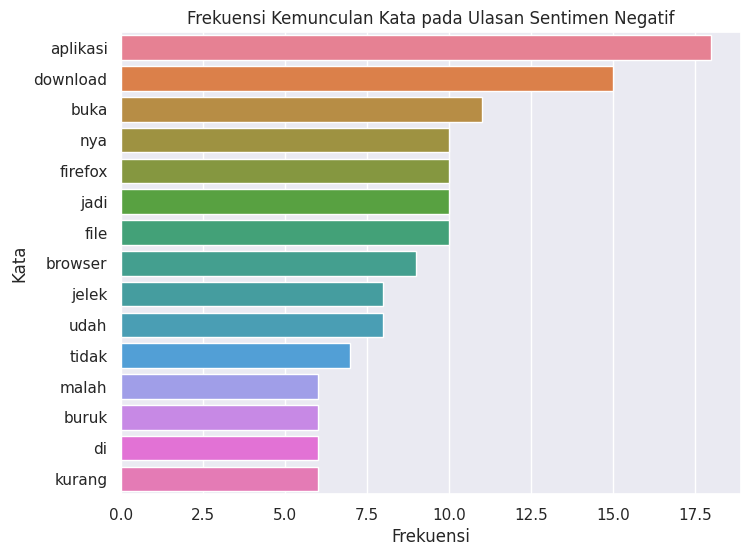

In [ ]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif

# Memfilter ulasan dengan sentimen positif
negative_reviews = data_final[data_final['sentimen'] == 1]['steamming'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(negative_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 15
top_words_negative = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_negative)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [ ]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : \n")
print(top_words_negative.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : 

    kata  frekuensi
aplikasi         18
download         15
    buka         11
     nya         10
 firefox         10
    jadi         10
    file         10
 browser          9
   jelek          8
    udah          8
   tidak          7
   malah          6
   buruk          6
      di          6
  kurang          6


In [ ]:
# Menghitung Jumlah Sentimen Positif, Negatif

data_final['sentimen'].value_counts()

sentimen
0    742
1    101
Name: count, dtype: int64

# **Transormation & Data Preparation**

In [ ]:
# Memisahkan data menjadi data latih dan data uji [ Splitting Data ]

X = data_final['steamming']
y = data_final['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
# Menggunakan TF - IDF Vectorizer untuk mengubah teks menjadi fitur numerik [ Text Vectorizer ]

vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
# Melakukan oversampling menggunakan Random Over-Sampling pada data latih

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_vec, y_train)

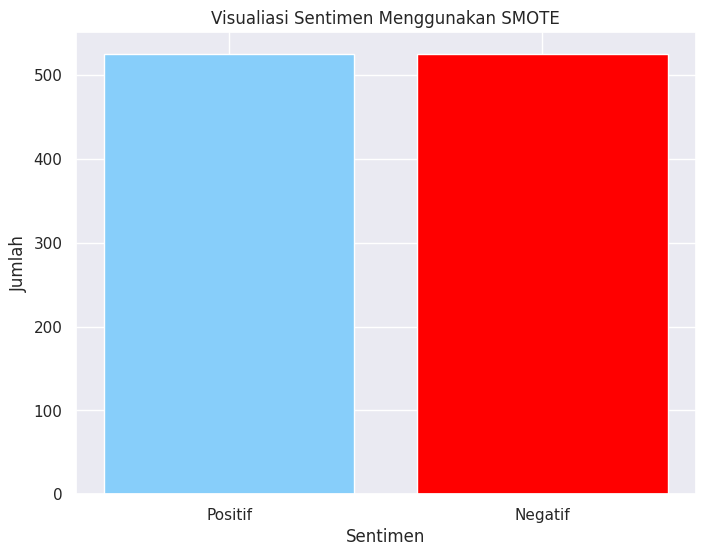

In [ ]:
# Visualiasi data hasil resampling menggunakan SMOTE

sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['lightskyblue', 'red'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Positif', 'Negatif'])
plt.show()

# **Data Mining**

In [ ]:
# Import Library Warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X_train_resampled.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Membangun Model Support vector Machine

for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
  svm = LinearSVC(C=c)
  svm.fit(X_train_resampled, y_train_resampled)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(X_test_vec))))

Akurasi untuk c = 0.01: 0.8458498023715415
Akurasi untuk c = 0.05: 0.8656126482213439
Akurasi untuk c = 0.25: 0.8616600790513834
Akurasi untuk c = 0.5: 0.8735177865612648
Akurasi untuk c = 0.75: 0.8695652173913043
Akurasi untuk c = 1: 0.8695652173913043


In [ ]:
# Menginisialisasi classifier SVM linier,
# membungkusnya dengan model kalibrasi untuk meningkatkan prediksi probabilitasnya,
# dan kemudian melatih model gabungan tersebut pada data pelatihan.

linear_svc = LinearSVC(C = 1.0)
calibrated_svc = CalibratedClassifierCV(linear_svc)
calibrated_svc.fit(X_train_vec, y_train)

CalibratedClassifierCV(estimator=LinearSVC())

# **Interpretation / Evaluation**


1.   Classification Report
2.   Confusion Matrix
3.   Classification Accuracy
4.   Classification Error




In [ ]:
# Final Accuracy Score Model

print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(X_test_vec)))

Accuracy score model final: 0.8695652173913043 


In [ ]:
# Classification Report

from sklearn.metrics import confusion_matrix

# Evaluasi Model
y_pred = svm.predict(X_test_vec)
print('Akurasi Model Support Vector Machine : {:.4f}' .format(svm.score(X_test_vec, y_test)))

print("\nLaporan Klasifikasi :\n", classification_report(y_test, y_pred))

Akurasi Model Support Vector Machine : 0.8696

Laporan Klasifikasi :
               precision    recall  f1-score   support

           0       0.91      0.94      0.93       217
           1       0.55      0.44      0.49        36

    accuracy                           0.87       253
   macro avg       0.73      0.69      0.71       253
weighted avg       0.86      0.87      0.86       253



In [ ]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])

print('\nTrue Negatives (TN) = ', cm[1, 1])

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])



print('\nAccuracy = ', accuracy)

Confusion matrix

 [[204  13]
 [ 20  16]]

True Positives (TP) =  204

True Negatives (TN) =  16

False Positives (FP) =  13

False Negatives (FN) =  20

Accuracy =  0.8695652173913043


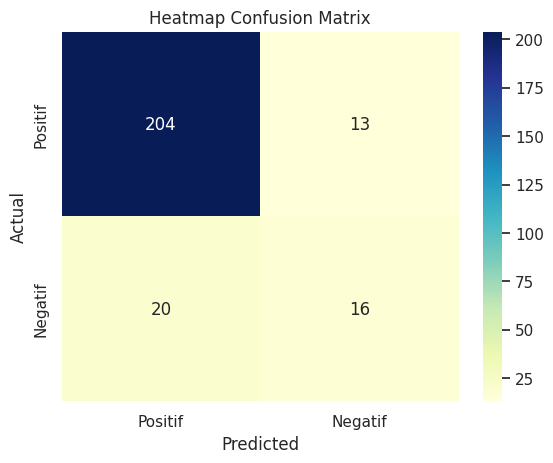

In [ ]:
# Visualisasi Heatmap Confusion Matrix

cm_matrix = pd.DataFrame(data=cm, columns=['Positif', 'Negatif'],
                         index=['Positif', 'Negatif'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap Confusion Matrix')
plt.show()

In [ ]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


In [ ]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8696


In [ ]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1304


# **Testing**

In [ ]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : Browser nya bagus, dipakai untuk browsing dan mengunduh file juga cepat. Sejauh ini saya belum menemukan kendala apapun. Untuk fitur "perlindungan pelacakan" bekerja dengan sangat baik dan fitur "ekstensi" sangat efektif memblokir berbagai macam iklan dan pop-up. Yang lebih bagusnya lagi, saya bisa browsingan tanpa rasa khawatir aktivitas saya di internet terekspos! Luar biasa... Kerja bagus Firefox!
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 97.08%
Probabilitas: 97.07937654234108 %


In [ ]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : Kecewa.. fitur download ulang hilang.. tp notifikasi download gagal ada.. notif selalu muncul.. mengganggu sekali.. update kok malah jd jelek..
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 74.98%
Probabilitas: 74.98417208188857 %
